## **CodeClause**
## **Task1: Churn Prediction in Telecom Industry using Logistic Regression**
##**MB Hariharan**

# **Importing necessary liberaries**

In [54]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

**2. Exploratory Data Analysis**

In [55]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
tel1=pd.read_csv('https://raw.githubusercontent.com/bensadeghi/pyspark-churn-prediction/master/data/churn-bigml-80.csv')

In [57]:
tel_2 = pd.read_csv('https://raw.githubusercontent.com/bensadeghi/pyspark-churn-prediction/master/data/churn-bigml-20.csv')

In [58]:
# load all dataset into a DataFrame
telcom = pd.concat([tel_1, tel_2], ignore_index=True)

In [59]:
telcom.head(10)


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
5,AK,36,408,No,Yes,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0,False
6,MI,65,415,No,No,0,211.3,120,35.92,162.6,122,13.82,134.7,118,6.06,13.2,5,3.56,3,False
7,ID,119,415,No,No,0,159.1,114,27.05,231.3,117,19.66,143.2,91,6.44,8.8,3,2.38,5,True
8,VA,10,408,No,No,0,186.1,112,31.64,190.2,66,16.17,282.8,57,12.73,11.4,6,3.08,2,False
9,WI,68,415,No,No,0,148.8,70,25.30,246.5,164,20.95,129.8,103,5.84,12.1,3,3.27,3,False


In [60]:
telcom.shape

(1334, 20)

In [61]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334 entries, 0 to 1333
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   1334 non-null   object 
 1   Account length          1334 non-null   int64  
 2   Area code               1334 non-null   int64  
 3   International plan      1334 non-null   object 
 4   Voice mail plan         1334 non-null   object 
 5   Number vmail messages   1334 non-null   int64  
 6   Total day minutes       1334 non-null   float64
 7   Total day calls         1334 non-null   int64  
 8   Total day charge        1334 non-null   float64
 9   Total eve minutes       1334 non-null   float64
 10  Total eve calls         1334 non-null   int64  
 11  Total eve charge        1334 non-null   float64
 12  Total night minutes     1334 non-null   float64
 13  Total night calls       1334 non-null   int64  
 14  Total night charge      1334 non-null   

The chun column is the target coloumn

In [62]:
# accessing Churn feature
telcom['Churn'].head(10)


0    False
1     True
2     True
3    False
4    False
5    False
6    False
7     True
8    False
9    False
Name: Churn, dtype: bool

 **Descriptive Analysis and Data**

In [63]:
telcom.describe()


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000
mean,102.841079,436.157421,8.407796,180.948126,100.937031,30.761769,203.355322,100.476762,17.285262,199.685307,100.113943,8.985907,10.238381,4.527736,2.764948,1.563718
std,40.804166,41.767629,13.989230,55.487803,20.389138,9.432923,49.700616,18.941153,4.224575,49.741263,20.164937,2.238589,2.806796,2.481511,0.757882,1.332857
min,1.000000,408.000000,0.000000,25.900000,30.000000,4.400000,48.100000,37.000000,4.090000,23.200000,42.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,408.000000,0.000000,146.225000,87.250000,24.855000,170.825000,88.000000,14.520000,167.825000,86.000000,7.555000,8.600000,3.000000,2.320000,1.000000
50%,102.000000,415.000000,0.000000,178.300000,101.000000,30.310000,203.700000,101.000000,17.310000,201.600000,100.000000,9.070000,10.500000,4.000000,2.840000,1.000000
75%,128.000000,415.000000,20.000000,220.700000,115.000000,37.520000,236.475000,113.000000,20.097500,231.500000,113.750000,10.420000,12.075000,6.000000,3.262500,2.000000
max,232.000000,510.000000,51.000000,334.300000,165.000000,56.830000,361.800000,168.000000,30.750000,367.700000,175.000000,16.550000,18.300000,18.000000,4.940000,8.000000


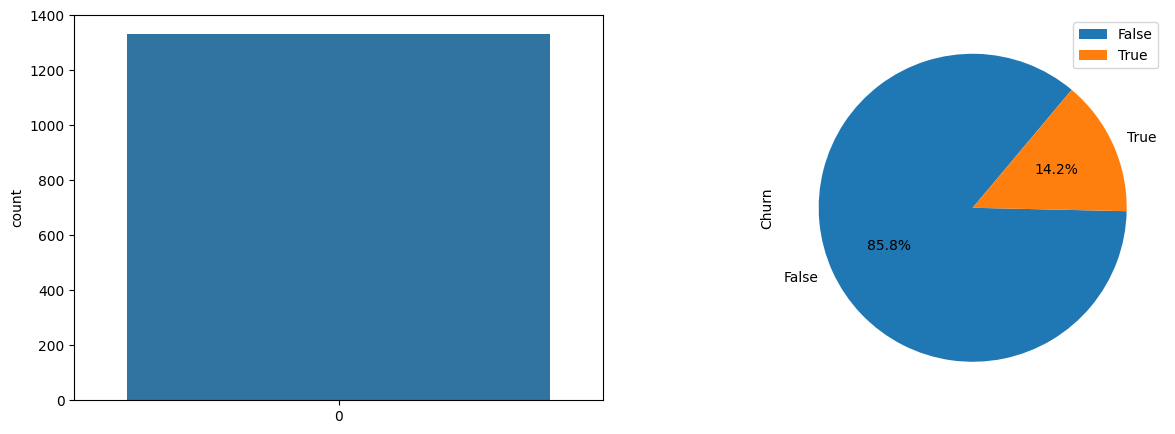

In [64]:
fig, axs = plt.subplots(1,2, figsize = (15,5))
plt1 = sns.countplot(telcom['Churn'], ax = axs[0])

pie_churn = pd.DataFrame(telcom['Churn'].value_counts())
pie_churn.plot.pie( subplots=True,labels = pie_churn.index.values, autopct='%1.1f%%', figsize = (15,5), startangle= 50, ax = axs[1])
# Unsquish the pie.
plt.gca().set_aspect('equal')

plt.show()

 We have a data with 14.2% churn rate.

In [65]:
# Count the number of data points in each category
y = telcom['Churn'].value_counts()
y

False    1144
True      190
Name: Churn, dtype: int64

<Axes: >

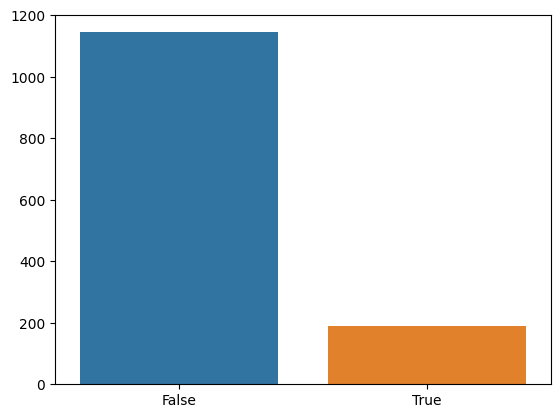

In [66]:
sns.barplot(x=y.index, y=y.values)

**Statistics for both the classes**



In [67]:
# Group telcom by 'Churn' and compute the mean
telcom.groupby(['Churn']).mean()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
Churn,,,,,,,,,,,,,,,,
False,102.636364,435.695804,8.991259,175.460140,100.776224,29.828829,199.799650,100.047203,16.983024,198.815385,100.258741,8.946731,10.242657,4.512238,2.766084,1.437063
True,104.073684,438.936842,4.894737,213.991579,101.905263,36.379053,224.764211,103.063158,19.105053,204.923158,99.242105,9.221789,10.212632,4.621053,2.758105,2.326316


Churners seem to make more customer service calls than non-churners.

In [68]:
telcom.groupby(['Churn']).std()


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
Churn,,,,,,,,,,,,,,,,
False,41.492041,41.416035,14.238252,50.505404,20.270237,8.585959,48.151688,18.723093,4.093029,50.384752,20.286561,2.267614,2.803441,2.420716,0.757012,1.210001
True,36.464447,43.835868,11.821847,70.774208,21.120002,12.031480,53.502743,20.062237,4.547123,45.447495,19.445605,2.044892,2.834229,2.825354,0.765075,1.730169


From the above we can identify that churners have more std in many features

**Churn-State**

In [69]:
telcom.groupby('State')['Churn'].value_counts()

State  Churn
AK     False    18
AL     False    26
       True      2
AR     False    16
AZ     False    36
                ..
WI     True      6
WV     False    30
       True      6
WY     False    20
       True      2
Name: Churn, Length: 93, dtype: int64

<Axes: xlabel='State'>

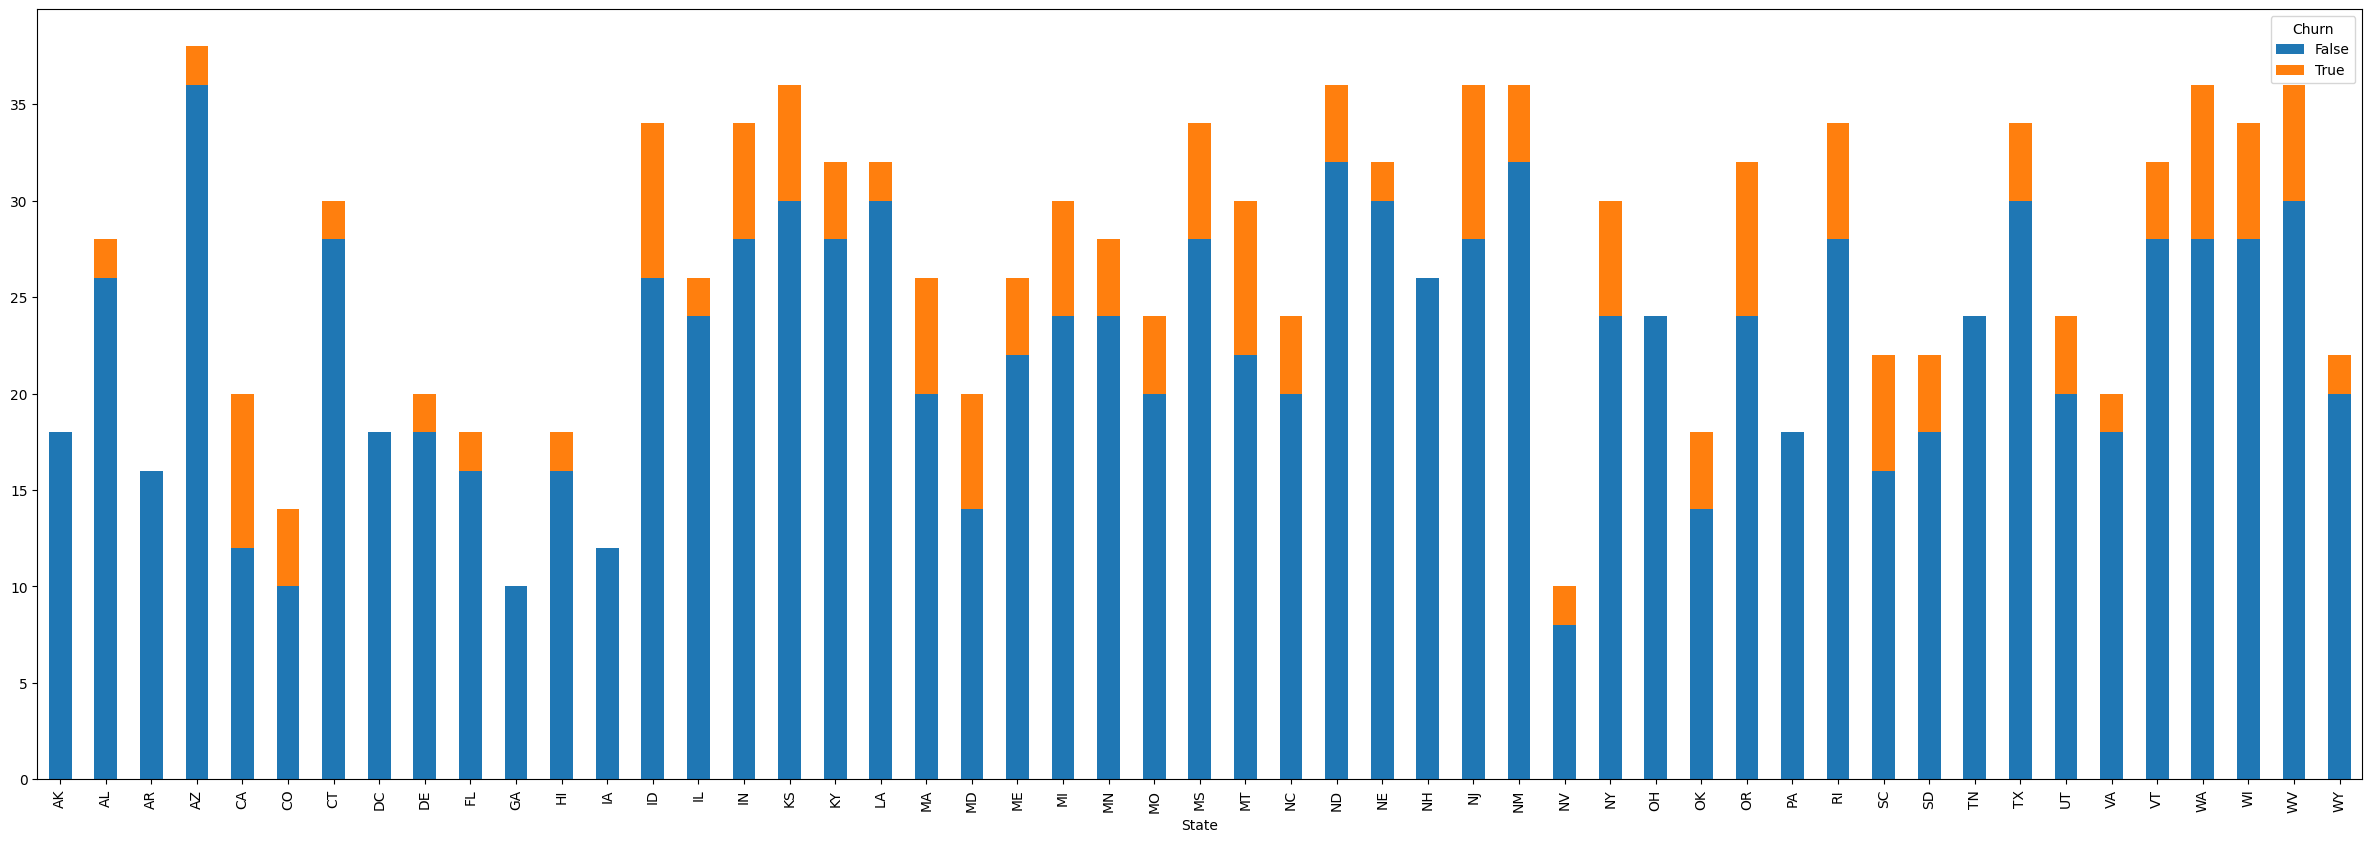

In [70]:
telcom.groupby(['State','Churn']).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10))

The graph shows the state wise churners and non churners we can see state ID has many churners

**Exploring feature distributions**

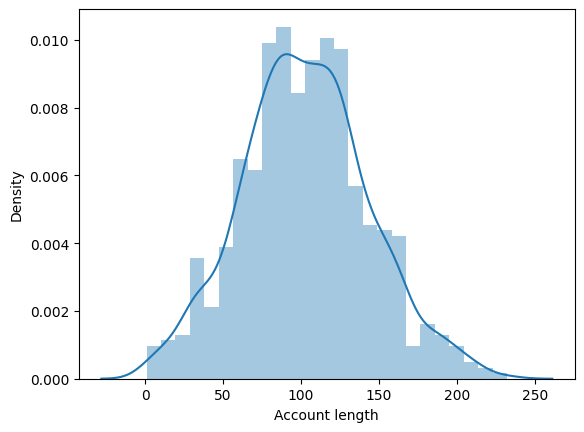

In [71]:
# visualize the distribution of 'Account length'
sns.distplot(telcom['Account length'])

# display the plot
plt.show()

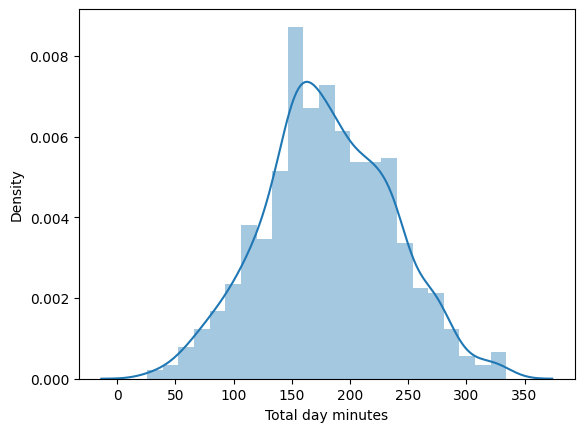

In [72]:
sns.distplot(telcom['Total day minutes'])
plt.show()

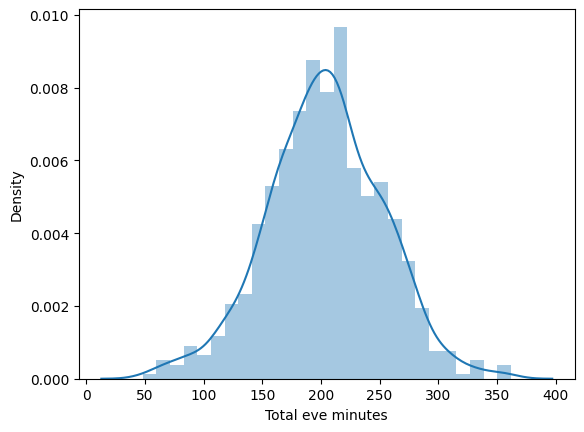

In [73]:
sns.distplot(telcom['Total eve minutes'])
plt.show()

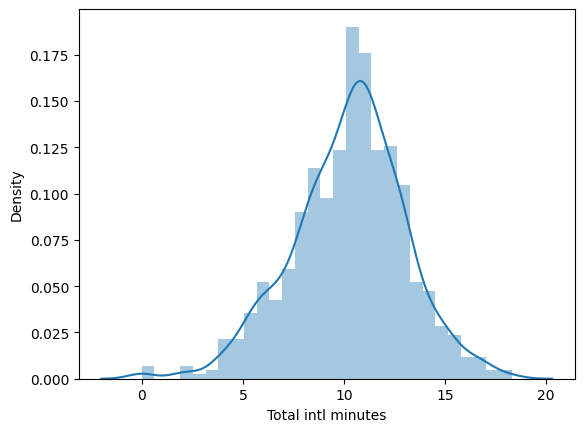

In [74]:
sns.distplot(telcom['Total intl minutes'])
plt.show()

**Area Code**

In [75]:
telcom.groupby('Area code')['Churn'].value_counts()

Area code  Churn
408        False    282
           True      56
415        False    592
           True      82
510        False    270
           True      52
Name: Churn, dtype: int64

<Axes: xlabel='Area code'>

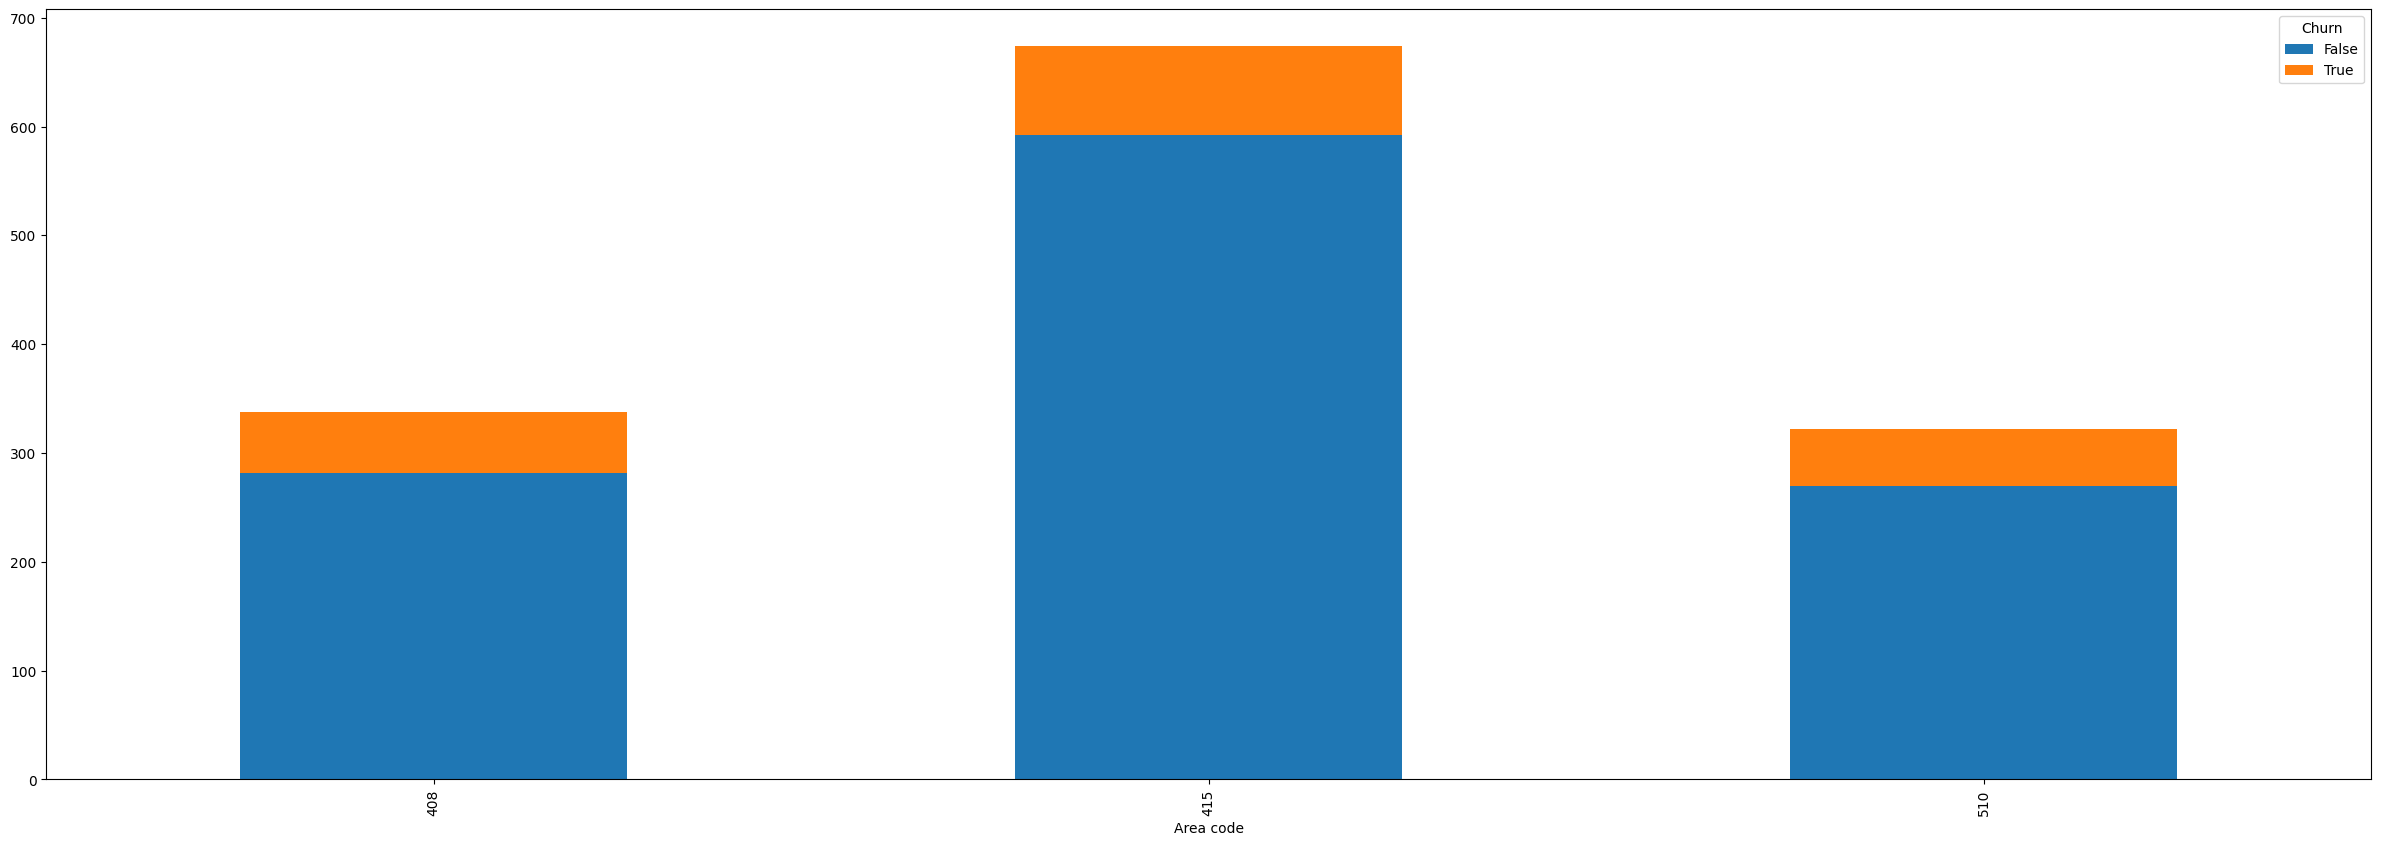

In [76]:
telcom.groupby(['Area code','Churn']).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10))

**3. Data preprocessing**

In [77]:
# Check for missing values
has_missing = telcom.isnull().any()
has_missing

State                     False
Account length            False
Area code                 False
International plan        False
Voice mail plan           False
Number vmail messages     False
Total day minutes         False
Total day calls           False
Total day charge          False
Total eve minutes         False
Total eve calls           False
Total eve charge          False
Total night minutes       False
Total night calls         False
Total night charge        False
Total intl minutes        False
Total intl calls          False
Total intl charge         False
Customer service calls    False
Churn                     False
dtype: bool

so there is no null values present in any feature

In [78]:
# check for duplicate rows 
duplicate_rows = telcom[telcom.duplicated()]
duplicate_rows

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
667,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
668,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
669,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
670,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
671,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
1330,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
1331,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
1332,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


In [79]:
telcom = telcom.drop_duplicates() #Removing duplicate rows


**Identifying features to convert**

In [80]:
telcom.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [81]:
telcom.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [82]:
# Find the columns that contain boolean values
bool_columns = telcom.select_dtypes(include=['bool']).columns
print(bool_columns)

# Find the columns of object type
object_columns = telcom.select_dtypes(include=['object']).columns
print(object_columns)

Index(['Churn'], dtype='object')
Index(['State', 'International plan', 'Voice mail plan'], dtype='object')


**Encoding binary features**

In [83]:
# Convert the boolean values to integers
telcom[bool_columns] = telcom[bool_columns].astype(int)

In [84]:
# Replace 'no' with 0 and 'yes' with 1 in 'International plan' and 'Voice mail plan'
telcom[['International plan','Voice mail plan']] = telcom[['International plan','Voice mail plan']].apply(lambda x: x.map({'No': 0, 'Yes': 1}))

In [85]:
# see the results
telcom[['International plan','Voice mail plan','Churn']].head()

,International plan,Voice mail plan,Churn
0,0,0,0
1,0,0,1
2,0,0,1
3,0,0,0
4,0,0,0


**Feature selection and engineering**

In [86]:
# drop 'State' feature
telcom = telcom.drop(telcom[['State']], axis=1)

# Calculate the correlation matrix
corr_matrix = telcom.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop)

# Drop the correlated features from the dataset
telcom = telcom.drop(telcom[to_drop], axis=1)

telcom.head()

['Number vmail messages', 'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']


,Account length,Area code,International plan,Voice mail plan,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,117,408,0,0,184.5,97,351.6,80,215.8,90,8.7,4,1,0
1,65,415,0,0,129.1,137,228.5,83,208.8,111,12.7,6,4,1
2,161,415,0,0,332.9,67,317.8,97,160.6,128,5.4,9,4,1
3,111,415,0,0,110.4,103,137.3,102,189.6,105,7.7,6,2,0
4,49,510,0,0,119.3,117,215.1,109,178.7,90,11.1,1,1,0


**Feature scaling**

To ensure that all variables are on the same scale and have comparable influence on the model.
eg: Let's see the different scales of the 'Total intl calls' and 'Total night minutes' features:



In [87]:
telcom['Total intl calls'].describe()

count    667.000000
mean       4.527736
std        2.482442
min        0.000000
25%        3.000000
50%        4.000000
75%        6.000000
max       18.000000
Name: Total intl calls, dtype: float64

In [88]:
telcom['Total night minutes'].describe()

count    667.000000
mean     199.685307
std       49.759931
min       23.200000
25%      167.950000
50%      201.600000
75%      231.500000
max      367.700000
Name: Total night minutes, dtype: float64

In [89]:
# from sklearn.preprocessing import StandardScaler

# Scale telcom using StandardScaler
features_to_scale = [column for column in telcom.columns if column not in ['International plan','Voice mail plan','Churn']]
# print(features_to_scale)
telcom_scaled = StandardScaler().fit_transform(telcom[features_to_scale])

# Add column names back for readability
telcom_scaled_df = pd.DataFrame(telcom_scaled, columns=features_to_scale)

# summary statistics
print(telcom_scaled_df.describe())

# final preprocessed dataframe
telcom = pd.concat([telcom_scaled_df, telcom[['International plan', 'Voice mail plan','Churn']]], axis=1)

       Account length     Area code  Total day minutes  Total day calls  \
count    6.670000e+02  6.670000e+02       6.670000e+02     6.670000e+02   
mean    -4.261126e-17 -4.420918e-16       1.318286e-16    -5.592728e-17   
std      1.000750e+00  1.000750e+00       1.000750e+00     1.000750e+00   
min     -2.496786e+00 -6.743974e-01      -2.795322e+00    -3.480463e+00   
25%     -6.580491e-01 -6.743974e-01      -6.255634e-01    -6.592761e-01   
50%     -2.062032e-02 -5.067407e-01      -4.774237e-02     3.089494e-03   
75%      6.168085e-01 -5.067407e-01       7.166761e-01     6.899871e-01   
max      3.166524e+00  1.768601e+00       2.764741e+00     3.143193e+00   

       Total eve minutes  Total eve calls  Total night minutes  \
count       6.670000e+02     6.670000e+02         6.670000e+02   
mean        1.917507e-16     3.462165e-16        -3.102632e-16   
std         1.000750e+00     1.000750e+00         1.000750e+00   
min        -3.124982e+00    -3.352519e+00        -3.549397e+

**4.Model Building and Performance Evaluation** 
  **

**Logistic Regression**

In [90]:
# from sklearn.linear_model import LogisticRegression

# instantiate our classifier
clf = LogisticRegression()

**Creating training and test sets**

In [91]:
# from sklearn.model_selection import train_test_split

# create feature variable (which holds all of the features of telco by dropping the target variable 'Churn' from telco)
X = telcom.drop(telcom[['Churn']], axis=1)

# create target variable
y = telcom['Churn']

# Create training and testing sets (here 80% of the data is used for training.)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [92]:
# Fit to the training data
clf.fit(X_train, y_train)

# The predicted labels of classifier
y_pred = clf.predict(X_test)

In [98]:
print(y_pred)

[0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [93]:
print(X_train.shape)
print(X_test.shape)

(466, 13)
(201, 13)


**Confustion Matrix**

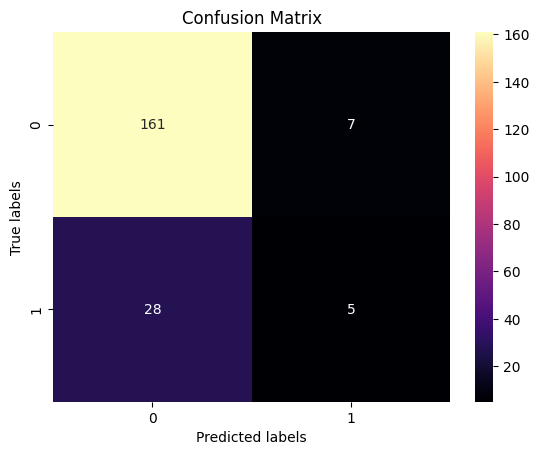

In [94]:
# Calculate the confusion matrix
matrix = confusion_matrix(y_test, y_pred)
# print(matrix)

# Plot the confusion matrix using seaborn
sns.heatmap(matrix, annot=True, fmt='d', cmap='magma')

# Add labels to the plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       168
           1       0.42      0.15      0.22        33

    accuracy                           0.83       201
   macro avg       0.63      0.55      0.56       201
weighted avg       0.78      0.83      0.79       201



**ROC Curve**

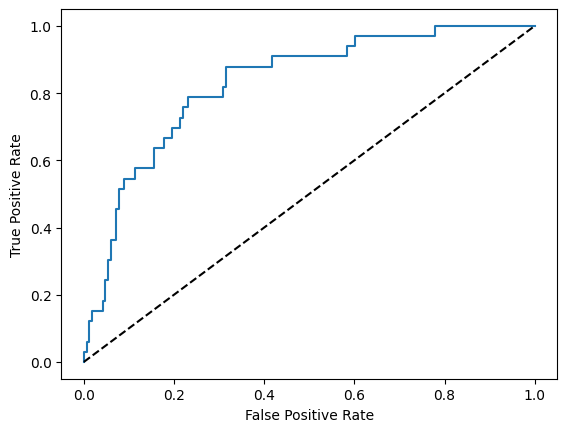

In [96]:
# Generate the probabilities
y_pred_prob = clf.predict_proba(X_test)[:,1]

# Use roc_curve() to calculate the false positive rate, true positive rate, and thresholds.
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

**Area under the ROC curve**

In [97]:

roc_auc_score(y_test, y_pred_prob)

0.8286435786435786